
* Systems Design, Integration and Control
* CSIM
* Katherine Robles Martínez de la Vega


---




# **By Carrot or by Stick: Cognitive Reinforcement Learning in Parkinsonism**

Frank, M. J., Seeberger, L. C., & O'Reilly, R. C. (2004). By Carrot or by Stick: Cognitive Reinforcement Learning in Parkinsonism. *Science, 306*(5703), 1940-1943. DOI: 10.1126/science.1102941

Frank et al. (2004) explored the involvement of DA interactions in probabilistic and deterministic tasks in Parkinson's Disease patients. *'Due to depleted DA, those patients OFF medication should have deficits in learning from positive feedback, whereas those ON medication should learn from positive feedback'*. This means those patients with high DA levels should choose always the option that gives them positive rewards and those with low DA levels should avoid always the option that does not give reward or gives negative rewards.
This project aims to simulate both tasks presented in the paper.

# **Probabilistic Task**

The probabilistic task consists of 3 different stimulus pairs presented in random order. The task is to choose one of the 2 stimuli and learn from the rewards. Since it is probabilistic task, in AB trials, the stimuli A was correct in the 80% of the trials and stimuli B was incorrect in the remaining  20%. In CD trials, the stimuli C is correct in the 70% of the trials and stimuli D in the remaining 30%. And in EF trials, the stimuli E is correct in the 60% of the trials and stimuli F is correct in the remaining 40%.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Defining the states of each stimulus pair

In [2]:
# Define the AB states
pair_states_AB = {
    'AB_1' : 0,
    'AB_2' : 1,
    'AB_3' : 2,
    'AB_4' : 3,
    'AB_5' : 4,
    'AB_6' : 5,
    'AB_7' : 6,
    'AB_8' : 7,
    'AB_9' : 8,
    'AB_10' : 9
}


# Define the CD states
pair_states_CD = {
    'CD_1' : 0,
    'CD_2' : 1,
    'CD_3' : 2,
    'CD_4' : 3,
    'CD_5' : 4,
    'CD_6' : 5,
    'CD_7' : 6,
    'CD_8' : 7,
    'CD_9' : 8,
    'CD_10' : 9
}

# Define the EF states
pair_states_EF = {
    'EF_1' : 0,
    'EF_2' : 1,
    'EF_3' : 2,
    'EF_4' : 3,
    'EF_5' : 4,
    'EF_6' : 5,
    'EF_7' : 6,
    'EF_8' : 7,
    'EF_9' : 8,
    'EF_10' : 9
}

### Defining the actions of each stimulus pair

In [3]:
# Define the total actions
actions = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4,
    'F' : 5
}

# Define the AB actions
actions_AB = {
    'A' : 0,
    'B' : 1
}


# Define the CD actions
actions_CD = {
    'C' : 0,
    'D' : 1
}


# Define the EF actions
actions_EF = {
    'E' : 0,
    'F' : 1
}

### Defining the reward in each stimulus pair

In [4]:
# Define the rewards

# In AB trials, A is correct in 80%
rewards_AB = np.array([[1,0],
                    [1,0],
                    [1,0],
                    [1,0],
                    [1,0],
                    [1,0],
                    [1,0],
                    [1,0],
                    [0,1],
                    [0,1]])

# In CD trials, C is correct in 70%
rewards_CD = np.array([[1,0],
                    [1,0],
                    [1,0],
                    [1,0],
                    [1,0],
                    [1,0],
                    [1,0],
                    [0,1],
                    [0,1],
                    [0,1]])

# In EF trials, E is correct in 60%
rewards_EF = np.array([[1,0],
                    [1,0],
                    [1,0],
                    [1,0],
                    [1,0],
                    [1,0],
                    [0,1],
                    [0,1],
                    [0,1],
                    [0,1]])

### Maps indices to locations and actions

In [5]:
# Maps indices to locations
state_to_label_AB = dict((state,label) for label,state in pair_states_AB.items())
state_to_label_CD = dict((state,label) for label,state in pair_states_CD.items())
state_to_label_EF = dict((state,label) for label,state in pair_states_EF.items())

In [6]:
# Maps indices to action
action_to_label = dict((action,label) for label,action in actions.items())
action_to_label_AB = dict((action,label) for label,action in actions_AB.items())
action_to_label_CD = dict((action,label) for label,action in actions_CD.items())
action_to_label_EF = dict((action,label) for label,action in actions_EF.items())

### Initializating parameters

In [7]:
# Initialize parameters
gamma = 0.15 # Discount factor //This value because it gives more weight to immediate reinforcements since this is not a dynamic game, but it is "action-reaction"
alpha = 0.90 # Learning rate   //High value because it gives more importance to new experiences than ones learned

### Q-learning

In [8]:
class QAgent():
    
    # Initialize alpha, gamma, rewards
    def __init__(self, alpha, gamma, rewards):
        
        self.gamma = gamma  
        self.alpha = alpha 
        self.rewards = rewards
        
    # Training the robot in the environment
    def training(self, iterations,iter_end_explore):

        # Initializing Q-Values
        Q = np.array(np.zeros([10,2]))
                                                                
        # Copy of rewards matrix
        rewards_new = np.copy(self.rewards)           
        
        # This matrix stores the total sum of rewards (of all states) of both actions
        rewards_over_time = np.array(np.zeros([iterations,2]))

        # Reinforcement learning Q-learning
        for i in range(iterations):
            epsilon = max(1 - (1/iter_end_explore) * i, 0) # iter_end_explore is when epsilon (agent's probability to explore the environment) is gonna be 0
            random_state = np.random.randint(0,10)         # takes a random state from the 10 existing states

            if np.random.uniform() < epsilon:
                action = np.random.randint(0,2)  # explore
            else:
                action = np.argmax(rewards_new[random_state,:])  # exploit

            # Temporal-Difference method to calculate the agent's decision policies for every change of state it performs
            TD = rewards_new[random_state,action] + self.gamma * Q[random_state, np.argmax(Q[random_state,])] - Q[random_state,action]
            
            # Update the Q-table with the obtained value for the random state and the chosen reward action
            Q[random_state,action] += self.alpha * TD
            
            # Add the total of rewards that each action has for all states
            for k in range(10):
              rewards_over_time[i,0] += Q[k,0]
              rewards_over_time[i,1] += Q[k,1]

        # Returns the table obtained after learning and the matrix of positive rewards accumulated for each action throughout all iterations
        return Q, rewards_over_time

### Let's see the learning process of the agent over time

Learning process of **AB** stimulus over time

Q_table of AB states:


,A,B
0,1.176471,0.176471
1,1.176471,0.176471
2,1.176471,0.176469
3,1.176471,0.176471
4,1.176471,0.176471
5,1.176471,0.176471
6,1.176471,0.176471
7,1.176471,0.176471
8,0.176471,1.176471
9,0.176470,1.176471


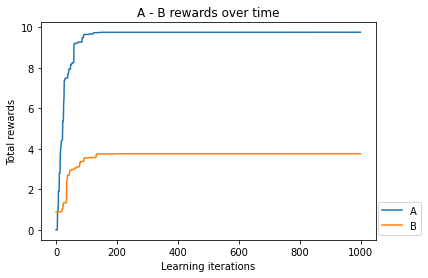

In [19]:
# Learning process of AB stimulus over time
qagent_AB = QAgent(alpha, gamma, rewards_AB)
Q_AB, rewards_over_time = qagent_AB.training(iterations = 1000, iter_end_explore = 500)
plt.plot (rewards_over_time[:,0], label='A')
plt.plot (rewards_over_time[:,1], label='B')
plt.legend(bbox_to_anchor=(1.15, 0), loc='lower right')
plt.title('A - B rewards over time')
plt.xlabel('Learning iterations')
plt.ylabel('Total rewards')

print("Q_table of AB states:")
Q_table_AB = pd.DataFrame(Q_AB, columns=('A', 'B'))
Q_table_AB      # The table indicates the rewards learned by the agent

Learning process of **CD** stimulus over time

Q_table of CD states:


,C,D
0,1.176471,0.176471
1,1.176471,0.176471
2,1.176471,0.176471
3,1.176471,0.176471
4,1.176471,0.176471
5,1.176471,0.176471
6,1.176471,0.176471
7,0.176471,1.176471
8,0.176471,1.176471
9,0.176471,1.176471


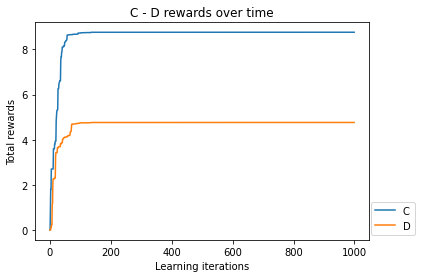

In [18]:
# Learning process of CD stimulus over time
qagent_CD = QAgent(alpha, gamma, rewards_CD)
Q_CD, rewards_over_time = qagent_CD.training(iterations = 1000, iter_end_explore = 500)
plt.plot (rewards_over_time[:,0], label='C')
plt.plot (rewards_over_time[:,1], label='D')
plt.legend(bbox_to_anchor=(1.15, 0), loc='lower right')
plt.title('C - D rewards over time')
plt.xlabel('Learning iterations')
plt.ylabel('Total rewards')

print("Q_table of CD states:")
Q_table_CD = pd.DataFrame(Q_CD, columns=('C', 'D'))
Q_table_CD # The table indicates the rewards learned by the agent

Learning process of **EF** stimulus over time

Q_table of EF states:


,E,F
0,1.176471,0.176471
1,1.176471,0.176471
2,1.176471,0.176471
3,1.176471,0.176471
4,1.176471,0.176471
5,1.176471,0.176471
6,0.176471,1.176471
7,0.176471,1.176471
8,0.176471,1.176471
9,0.176471,1.176471


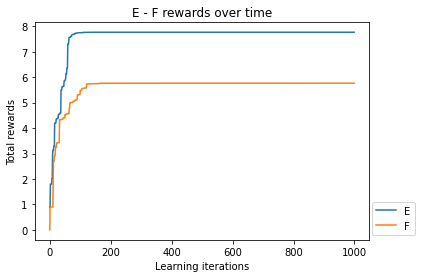

In [17]:
# Learning process of EF stimulus over time
qagent_EF = QAgent(alpha, gamma, rewards_EF)
Q_EF, rewards_over_time = qagent_EF.training(iterations = 1000, iter_end_explore = 500)
plt.plot (rewards_over_time[:,0], label='E')
plt.plot (rewards_over_time[:,1], label='F')
plt.legend(bbox_to_anchor=(1.15, 0), loc='lower right')
plt.title('E - F rewards over time')
plt.xlabel('Learning iterations')
plt.ylabel('Total rewards')

print("Q_table of EF states:")
Q_table_EF = pd.DataFrame(Q_EF, columns=('E', 'F'))
Q_table_EF # The table indicates the rewards learned by the agent

### Let's see the table that stores the total sum of all rewards of each stimuli in all learning iterations

In [12]:
# This table stores a total sum of all learned rewards of each stimuli in all learning iterations
Q_table = np.array(np.zeros([1,6]))
for i in range(10):
    Q_table[0,0] += Q_AB[i,0]
    Q_table[0,1] += Q_AB[i,1]
    Q_table[0,2] += Q_CD[i,0]
    Q_table[0,3] += Q_CD[i,1]
    Q_table[0,4] += Q_EF[i,0]
    Q_table[0,5] += Q_EF[i,1]

Q_table_df = pd.DataFrame(Q_table,columns=('A','B','C','D', 'E', 'F'))

Q_table_df

,A,B,C,D,E,F
0,9.764706,3.764706,8.764659,4.764705,7.764706,5.764529


### The next cell defines Dopamine levels, being that:


1.   Dopamine **burst** leads to **choose** the action with **highest reward** (good option meaning best '**carrot**')
2.   **Low** dopamine leads to **avoid** the action with **lowest** reward (bad option meaning worst '**stick**')





In [13]:
def get_action_from_Qtable(Q, action_1, action_2, DA):
        print(f"Learning reward from the action {action_1}: {Q[0,actions[action_1]]}")        
        print(f"Learning reward from the action {action_2}: {Q[0,actions[action_2]]}")
        action_1 = actions[action_1]
        action_2 = actions[action_2]
        if DA == 1:           # DA = 1 means that there are dopamine bursts
          chosen_action = np.argmax([Q[0,action_1],Q[0,action_2]])
        elif DA == 0:         # DA = 0 means that there is no dopamine or there are very low levels
          chosen_action = np.argmin([Q[0,action_1],Q[0,action_2]])
        if chosen_action == 0:
            chosen_action = action_1
        else:
            chosen_action = action_2
        chosen_action = action_to_label[chosen_action]
        return chosen_action

### Let's test if the agent has learned from the rewards and choose or avoid options depending on dopamine levels

Testing with **AB** pair

In [14]:
# Testing with AB pair
chosen_action = get_action_from_Qtable(Q_table, 'A', 'B', DA = 1)
print(f"My dopamine levels are very high and that is why I choose the option with the highest reward: {chosen_action}")

Learning reward from the action A: 9.764705805233739
Learning reward from the action B: 3.7647057522084593
My dopamine levels are very high and that is why I choose the option with the highest reward: A


Testing with **CD** pair

In [15]:
# Testing with CD pair
chosen_action = get_action_from_Qtable (Q_table,'C','D', DA = 0)
print(f"My dopamine levels are very low and that is why I avoid the option with the lowest reward: {chosen_action}")

Learning reward from the action C: 8.764658852331426
Learning reward from the action D: 4.764705039938535
My dopamine levels are very low and that is why I avoid the option with the lowest reward: D


Testing with **EF** pair

In [20]:
# Testing with EF pair
chosen_action = get_action_from_Qtable (Q_table,'E','F', DA = 0)
print(f"My dopamine levels are very low and that is why I avoid the option with the lowest reward: {chosen_action}")

Learning reward from the action E: 7.7647058702875835
Learning reward from the action F: 5.76452906457978
My dopamine levels are very low and that is why I avoid the option with the lowest reward: F
